In [ ]:
url = "https://github.com/bdemeshev/webinar_forecast_ts_2021/raw/main/monthly_marriages_2020.csv"

In [ ]:
!pip install sktime

In [ ]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

In [ ]:
data = pd.read_csv(url)
data.head()

,region,marriages,date
0,643 Российская Федерация,55509.0,2006-01-01
1,643 Российская Федерация,59495.0,2007-01-01
2,643 Российская Федерация,58668.0,2008-01-01
3,643 Российская Федерация,65507.0,2009-01-01
4,643 Российская Федерация,62980.0,2010-01-01


In [ ]:
rf = data[data['region'] == '643 Российская Федерация']
rf2 = rf.drop(columns='region')

In [ ]:
rf3 = rf2.sort_values(by='date')
rf3.index = pd.to_datetime(rf3['date'])

In [ ]:
rf3.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='date', length=180, freq=None)

In [ ]:
rf3.index = rf3.index.to_period('M')

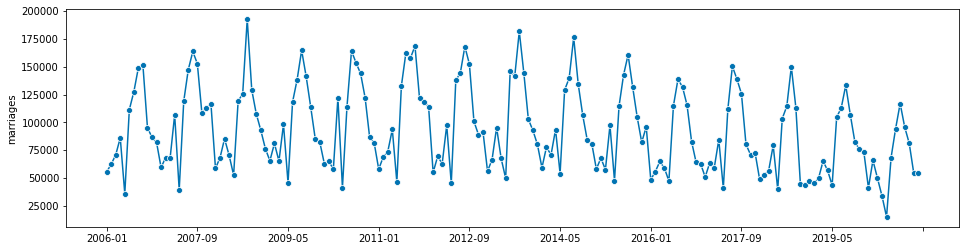

In [ ]:
plot_series(rf3['marriages']);

In [ ]:
y_train, y_test = temporal_train_test_split(rf3['marriages'], test_size=24)

In [ ]:
from sktime.forecasting.ets import AutoETS

In [ ]:
aaa = AutoETS(error='add', trend='add', seasonal='add', sp=12)
aaa.fit(y_train)

AutoETS(seasonal='add', sp=12, trend='add')

In [ ]:
aaa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:              marriages   No. Observations:                  156
Model:                       ETS(AAA)   Log Likelihood               -1780.554
Date:                Thu, 11 Feb 2021   AIC                           3597.109
Time:                        17:11:48   BIC                           3652.006
Sample:                    01-31-2006   HQIC                          3619.406
                         - 12-31-2018   Scale                    480214989.169
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.0024      0.097      0.025      0.980      -0.187       0.192
smoothing_trend         0.0024      0.002      1.521      0.128      -0.001       0.005
smoothing_seasonal      0.8078      0.088      9.149      0.000       0.635       0.981
initial_level        9.152e+04   8234.901     11.114      0.000    7.54e+04    1.08e+05
initial_trend         793.0594    664.309      1.194      0.233    -508.962    2095.081
initial_seasonal.0   -2.81e+04   2.08e+04     -1.349      0.177   -6.89e+04    1.27e+04
initial_seasonal.1  -1.961e+04   2.06e+04     -0.952      0.341      -6e+04    2.08e+04
initial_seasonal.2  -2.096e+04   2.03e+04     -1.034      0.301   -6.07e+04    1.88e+04
initial_seasonal.3   9012.1354   1.98e+04      0.455      0.649   -2.98e+04    4.79e+04
initial_seasonal.4  -4.592e+04   1.64e+04     -2.796      0.005   -7.81e+04   -1.37e+04
initial_seasonal.5   2.698e+04   2.04e+04      1.321      0.187   -1.31e+04     6.7e+04
initial_seasonal.6   4.601e+04   2.05e+04      2.250      0.024    5926.144    8.61e+04
initial_seasonal.7    7.88e+04   1.55e+04      5.079      0.000    4.84e+04    1.09e+05
initial_seasonal.8   5.495e+04   1.99e+04      2.767      0.006     1.6e+04    9.39e+04
initial_seasonal.9   1.741e+04   2.04e+04      0.855      0.393   -2.25e+04    5.74e+04
initial_seasonal.10  5121.2083   2.05e+04      0.250      0.803    -3.5e+04    4.53e+04
initial_seasonal.11          0   2.11e+04          0      1.000   -4.14e+04    4.14e+04
===================================================================================
Ljung-Box (Q):                       52.69   Jarque-Bera (JB):               831.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+17. Standard errors may be unstable.
"""

In [ ]:
horizon = np.arange(1, 25)
y_pred = aaa.predict(horizon)

In [ ]:
y_pred

2019-01     43969.434940
2019-02     49231.500689
2019-03     51538.901707
2019-04     73600.512513
2019-05     34037.282049
2019-06     98817.051497
2019-07    114335.891849
2019-08    141099.326845
2019-09    108435.138393
2019-10     44487.188767
2019-11     41845.020825
2019-12     44869.419751
2020-01     37864.469618
2020-02     43126.535367
2020-03     45433.936386
2020-04     67495.547191
2020-05     27932.316728
2020-06     92712.086175
2020-07    108230.926528
2020-08    134994.361523
2020-09    102330.173071
2020-10     38382.223445
2020-11     35740.055504
2020-12     38764.454430
Freq: M, dtype: float64

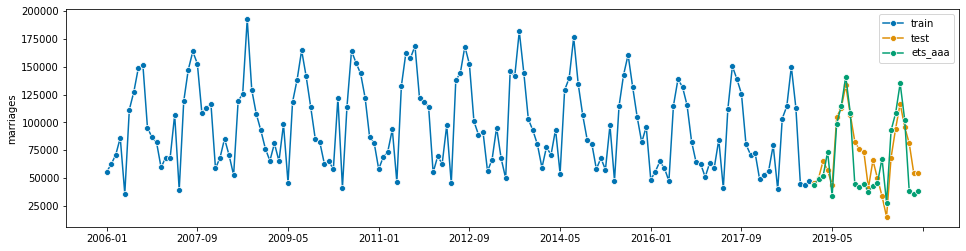

In [ ]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'ets_aaa']);

In [ ]:
from sktime.performance_metrics.forecasting import mape_loss
mape_loss(y_test, y_pred)

0.2684315119642098